In [2]:
import numpy as np
import pandas as pd
from inference_utils.TRIDENT_for_inference import TRIDENT_for_inference
from sklearn.metrics.pairwise import cosine_similarity
from inference_utils.pytorch_data_utils import check_closest_chemical
from inference_utils.pytorch_data_utils import __loadCLSembeddings__
from inference_utils.pytorch_data_utils import __loadtrainingdf__
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from inference_utils.pytorch_data_utils import __loadCLSembeddings__
from inference_utils.pytorch_data_utils import __loadtrainingdf__
from rdkit import Chem
import pandas as pd
from pubchempy import get_compounds

In [3]:
def convert_to_canonical(smiles):
    mol = Chem.MolFromSmiles(smiles)  # Convert SMILES string to RDKit mol
    if mol:  # If mol is not None (i.e., valid SMILES)
        return Chem.MolToSmiles(mol, canonical=True)  # Convert to canonical SMILES
    else:
        return smiles  # Return smiles for the invalid SMILES



Fish

In [4]:
MODEL_TYPE = 'EC50EC10'
SPECIES_GROUP = 'fish'
MODEL_VERSION = f'{MODEL_TYPE}_{SPECIES_GROUP}'
trident = TRIDENT_for_inference(model_version=MODEL_VERSION)
trident.load_fine_tuned_model()
#data = pd.read_excel('../data/tutorials/REACH_dataset.xlsx')
data = pd.read_excel('REACH_dataset.xlsx')
PREDICTION_ENDPOINT = 'EC50'
PREDICTION_EFFECT = 'MOR'
EXPOSURE_DURATION = 96
SMILES_COLUMN_NAME = 'SMILES'

/home/edelin/.conda/envs/trident_plot/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loading DNN... 

Model loaded.



In [5]:

# Add the new column
data['SMILES_Canonical_RDKit'] = data['SMILES'].apply(
    lambda x: convert_to_canonical(x) if pd.notnull(x) else None)

data = data.drop_duplicates(subset='SMILES_Canonical_RDKit')

In [6]:

results_fish = trident.predict_toxicity(SMILES = data[SMILES_COLUMN_NAME].to_list(), exposure_duration=EXPOSURE_DURATION, endpoint=PREDICTION_ENDPOINT, effect=PREDICTION_EFFECT, return_cls_embeddings=True)



Renamed NOEC *EC10* in 0 positions


100%|██████████| 1252/1252 [00:57<00:00, 21.71it/s]


In [7]:
results_fish=check_closest_chemical(results_fish,MODEL_TYPE, SPECIES_GROUP, PREDICTION_ENDPOINT, PREDICTION_EFFECT)
embeddings_results_fish=np.asarray(results_fish.CLS_embeddings.tolist(), dtype=np.float32)
training_data_fish_embeddings=__loadCLSembeddings__(MODEL_TYPE, SPECIES_GROUP) 
training_fish_embeddings=np.asarray(training_data_fish_embeddings.CLS_embeddings.tolist(),dtype=np.float32)

Invertebrates

In [8]:
MODEL_TYPE = 'EC50EC10'
SPECIES_GROUP = 'invertebrates'
MODEL_VERSION = f'{MODEL_TYPE}_{SPECIES_GROUP}'
trident = TRIDENT_for_inference(model_version=MODEL_VERSION)
trident.load_fine_tuned_model()
data = pd.read_excel('REACH_dataset.xlsx')
PREDICTION_ENDPOINT = 'EC50'
PREDICTION_EFFECT = 'MOR'
EXPOSURE_DURATION = 96
SMILES_COLUMN_NAME = 'SMILES'

/home/edelin/.conda/envs/trident_plot/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loading DNN... 

Model loaded.



In [9]:
# Add the new column
data['SMILES_Canonical_RDKit'] = data['SMILES'].apply(
    lambda x: convert_to_canonical(x) if pd.notnull(x) else None)

data = data.drop_duplicates(subset='SMILES_Canonical_RDKit')

In [10]:
results_invertebrates = trident.predict_toxicity(SMILES = data[SMILES_COLUMN_NAME].to_list(), exposure_duration=EXPOSURE_DURATION, endpoint=PREDICTION_ENDPOINT, effect=PREDICTION_EFFECT, return_cls_embeddings=True)



Renamed NOEC *EC10* in 0 positions


100%|██████████| 1252/1252 [00:54<00:00, 22.80it/s]


In [11]:
results_invertebrates=check_closest_chemical(results_invertebrates,MODEL_TYPE, 'invertebrates', PREDICTION_ENDPOINT, PREDICTION_EFFECT)
embeddings_results_invetebrates=np.asarray(results_invertebrates.CLS_embeddings.tolist(), dtype=np.float32)
training_data_invertebrates_embeddings=__loadCLSembeddings__(MODEL_TYPE, 'invertebrates') 
training_invertebrates_embeddings=np.asarray(training_data_invertebrates_embeddings.CLS_embeddings.tolist(),dtype=np.float32)

Algae

In [12]:
MODEL_TYPE = 'EC50EC10'
SPECIES_GROUP = 'algae'
MODEL_VERSION = f'{MODEL_TYPE}_{SPECIES_GROUP}'
trident = TRIDENT_for_inference(model_version=MODEL_VERSION)
trident.load_fine_tuned_model()
data = pd.read_excel('REACH_dataset.xlsx')
PREDICTION_ENDPOINT = 'EC50'
PREDICTION_EFFECT = 'POP'
EXPOSURE_DURATION = 96
SMILES_COLUMN_NAME = 'SMILES'

/home/edelin/.conda/envs/trident_plot/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loading DNN... 

Model loaded.



In [13]:
# Add the new column
data['SMILES_Canonical_RDKit'] = data['SMILES'].apply(
    lambda x: convert_to_canonical(x) if pd.notnull(x) else None)

data = data.drop_duplicates(subset='SMILES_Canonical_RDKit')

In [14]:
results_algae = trident.predict_toxicity(SMILES = data[SMILES_COLUMN_NAME].to_list(), exposure_duration=EXPOSURE_DURATION, endpoint=PREDICTION_ENDPOINT, effect=PREDICTION_EFFECT, return_cls_embeddings=True)



Renamed NOEC *EC10* in 0 positions
Did not return onehotencoding for Effect. Why? You specified only one Effect.


100%|██████████| 1252/1252 [00:55<00:00, 22.42it/s]


In [15]:
results_algae=check_closest_chemical(results_algae,MODEL_TYPE, 'algae', PREDICTION_ENDPOINT, 'POP')
embeddings_results_algae=np.asarray(results_algae.CLS_embeddings.tolist(), dtype=np.float32)
training_data_algae_embeddings=__loadCLSembeddings__(MODEL_TYPE, 'algae') 
training_algae_embeddings=np.asarray(training_data_algae_embeddings.CLS_embeddings.tolist(),dtype=np.float32)


In [16]:
#fish
train_cosine_fish={} # gather useful information from the training embeddings 
train_cosine_fish['mean cosine similarity']=cosine_similarity(training_fish_embeddings).mean(axis=0) #get mean cos sim for every training embedding 
train_cosine_df_fish=pd.DataFrame(train_cosine_fish)
#invertebrates
train_cosine_invertebrates={}
train_cosine_invertebrates['mean cosine similarity']=cosine_similarity(training_invertebrates_embeddings).mean(axis=0)
train_cosine_df_invertebrates=pd.DataFrame(train_cosine_invertebrates)
#algae
train_cosine_algae={}
train_cosine_algae['mean cosine similarity']=cosine_similarity(training_algae_embeddings).mean(axis=0)
train_cosine_df_algae=pd.DataFrame(train_cosine_algae)

In [17]:
#fish (to get the mean cosine similarity witin the training embeddings, sum them and divide by the nr of embeddings)
mean_tot_fish=sum(train_cosine_df_fish['mean cosine similarity'])/len(train_cosine_df_fish['mean cosine similarity'])
std_dev_tot_fish=train_cosine_df_fish['mean cosine similarity'].std() # get the standard deviation from the mean cos sim values of the training embeddings
# Calculate z-score for each training embedding and for each embedding in the REACH data
train_cosine_df_fish['z-score mean cosine similarity']=(train_cosine_df_fish['mean cosine similarity']-mean_tot_fish)/std_dev_tot_fish
results_fish['z-score mean cosine similarity']=(results_fish['mean cosine similarity']-mean_tot_fish)/std_dev_tot_fish
# check if the REACH data is in the training data
training_fish_all=__loadtrainingdf__('EC50EC10','fish','EC10')
results_fish['Is in training']=(results_fish['SMILES_Canonical_RDKit'].isin(training_fish_all['SMILES_Canonical_RDKit'])).astype(int)

#invertebrates
mean_tot_invertebrates=sum(train_cosine_df_invertebrates['mean cosine similarity'])/len(train_cosine_df_invertebrates['mean cosine similarity'])
std_dev_tot_invertebrates=train_cosine_df_invertebrates['mean cosine similarity'].std()
# Calculate z-score
train_cosine_df_invertebrates['z-score mean cosine similarity']=(train_cosine_df_invertebrates['mean cosine similarity']-mean_tot_invertebrates)/std_dev_tot_invertebrates
results_invertebrates['z-score mean cosine similarity']=(results_invertebrates['mean cosine similarity']-mean_tot_invertebrates)/std_dev_tot_invertebrates
training_invertebrates_all=__loadtrainingdf__('EC50EC10','invertebrates','EC10')
results_invertebrates['Is in training']=(results_invertebrates['SMILES_Canonical_RDKit'].isin(training_invertebrates_all['SMILES_Canonical_RDKit'])).astype(int)

#algae
mean_tot_algae=sum(train_cosine_df_algae['mean cosine similarity'])/len(train_cosine_df_algae['mean cosine similarity'])
std_dev_tot_algae=train_cosine_df_algae['mean cosine similarity'].std()
# Calculate z-score
train_cosine_df_algae['z-score mean cosine similarity']=(train_cosine_df_algae['mean cosine similarity']-mean_tot_algae)/std_dev_tot_algae
results_algae['z-score mean cosine similarity']=(results_algae['mean cosine similarity']-mean_tot_algae)/std_dev_tot_algae
training_algae_all=__loadtrainingdf__('EC50EC10','algae','EC10')
results_algae['Is in training']=(results_algae['SMILES_Canonical_RDKit'].isin(training_algae_all['SMILES_Canonical_RDKit'])).astype(int)

In [18]:
# Set the threshold value (For EC10, for EC50 it's 0.1)
threshold_value = 0.1
#fish
# Check th predictions against the threshold
toxic_df_fish = results_fish[results_fish['predictions (mg/L)'] < threshold_value]

# Show the toxic chemicals
print(len(toxic_df_fish)) 
#invertebrates
# Check th predictions against the threshold
toxic_df_invertebrates = results_invertebrates[results_invertebrates['predictions (mg/L)'] < threshold_value]

# Show the toxic chemicals
print(len(toxic_df_invertebrates)) 
#algae
# Check th predictions against the threshold
toxic_df_algae = results_algae[results_algae['predictions (mg/L)'] < threshold_value]

# Show the toxic chemicals
print(len(toxic_df_algae)) 

141
325
314


In [19]:

def plot_hexbin_uncertain(df_fish, df_invertebrate, df_algae, threshold, factor):
    vmin, vmax = 0, 100
    def prepare_data(df, threshold, factor):
        df['is toxic'] = (df['predictions (mg/L)'] * factor < threshold).astype(int)
        df['is uncertain'] = (abs(df['z-score mean cosine similarity']) > 2).astype(int)

        embeddings = np.array(df.CLS_embeddings.tolist()).astype(np.float32)
        pca = PCA(n_components=2).fit_transform(embeddings)
        projections = pd.DataFrame({'pc1': pca[:, 0], 'pc2': pca[:, 1]})
        return pd.concat([df, projections], axis=1)
    
    def plot_subplot(ax, df, title, show_legend=True):
        non_toxic_certain = df[(df['is toxic'] == 0)&(df['is uncertain']==0)]
        toxic_certain = df[(df['is toxic'] == 1)&(df['is uncertain']==0)]
        non_toxic_uncertain=df[(df['is toxic']==0)&(df['is uncertain']==1)]
        toxic_uncertain=df[(df['is toxic']==1)&(df['is uncertain']==1)]

        ax.hexbin(non_toxic_certain['pc1'], non_toxic_certain['pc2'], gridsize=50, cmap='Blues',mincnt=1, alpha=0.9,label='Non-toxic witin 2 std')
        ax.scatter(toxic_certain['pc1'], toxic_certain['pc2'], color='red', s=10, label='Toxic witin 2 std')
        ax.scatter(non_toxic_uncertain['pc1'],non_toxic_uncertain['pc2'],color='green',s=10, label='Non-toxic beyond 2 std')
        ax.scatter(toxic_uncertain['pc1'],toxic_uncertain['pc2'],color='orange',s=10, label='Toxic beyond 2 std')
        

        ax.set_title(title)
        ax.set_xlabel('PCA Component 1')
        ax.set_ylabel('PCA Component 2')
        if show_legend:
            # Custom legend handles
            ax.legend()

    # Prepare datasets
    df_fish = prepare_data(df_fish, threshold, factor)
    df_invertebrate = prepare_data(df_invertebrate, threshold, factor)
    df_algae = prepare_data(df_algae, threshold, factor)

    # Plot
    fig, axs = plt.subplots(3, 2, figsize=(15, 20))
    datasets = [(df_fish, "Fish"), (df_invertebrate, "Invertebrates"), (df_algae, "Algae")]
    for i, (df, label) in enumerate(datasets):
        plot_subplot(axs[i, 0], df, f'{label}: All Data')
        plot_subplot(axs[i, 1], df[df['Is in training'] == 0], f'{label}: New Data Only', show_legend=False)
    plt.tight_layout()
    plt.savefig("reach_all_fig_EC10.pdf",format='pdf')
    return fig


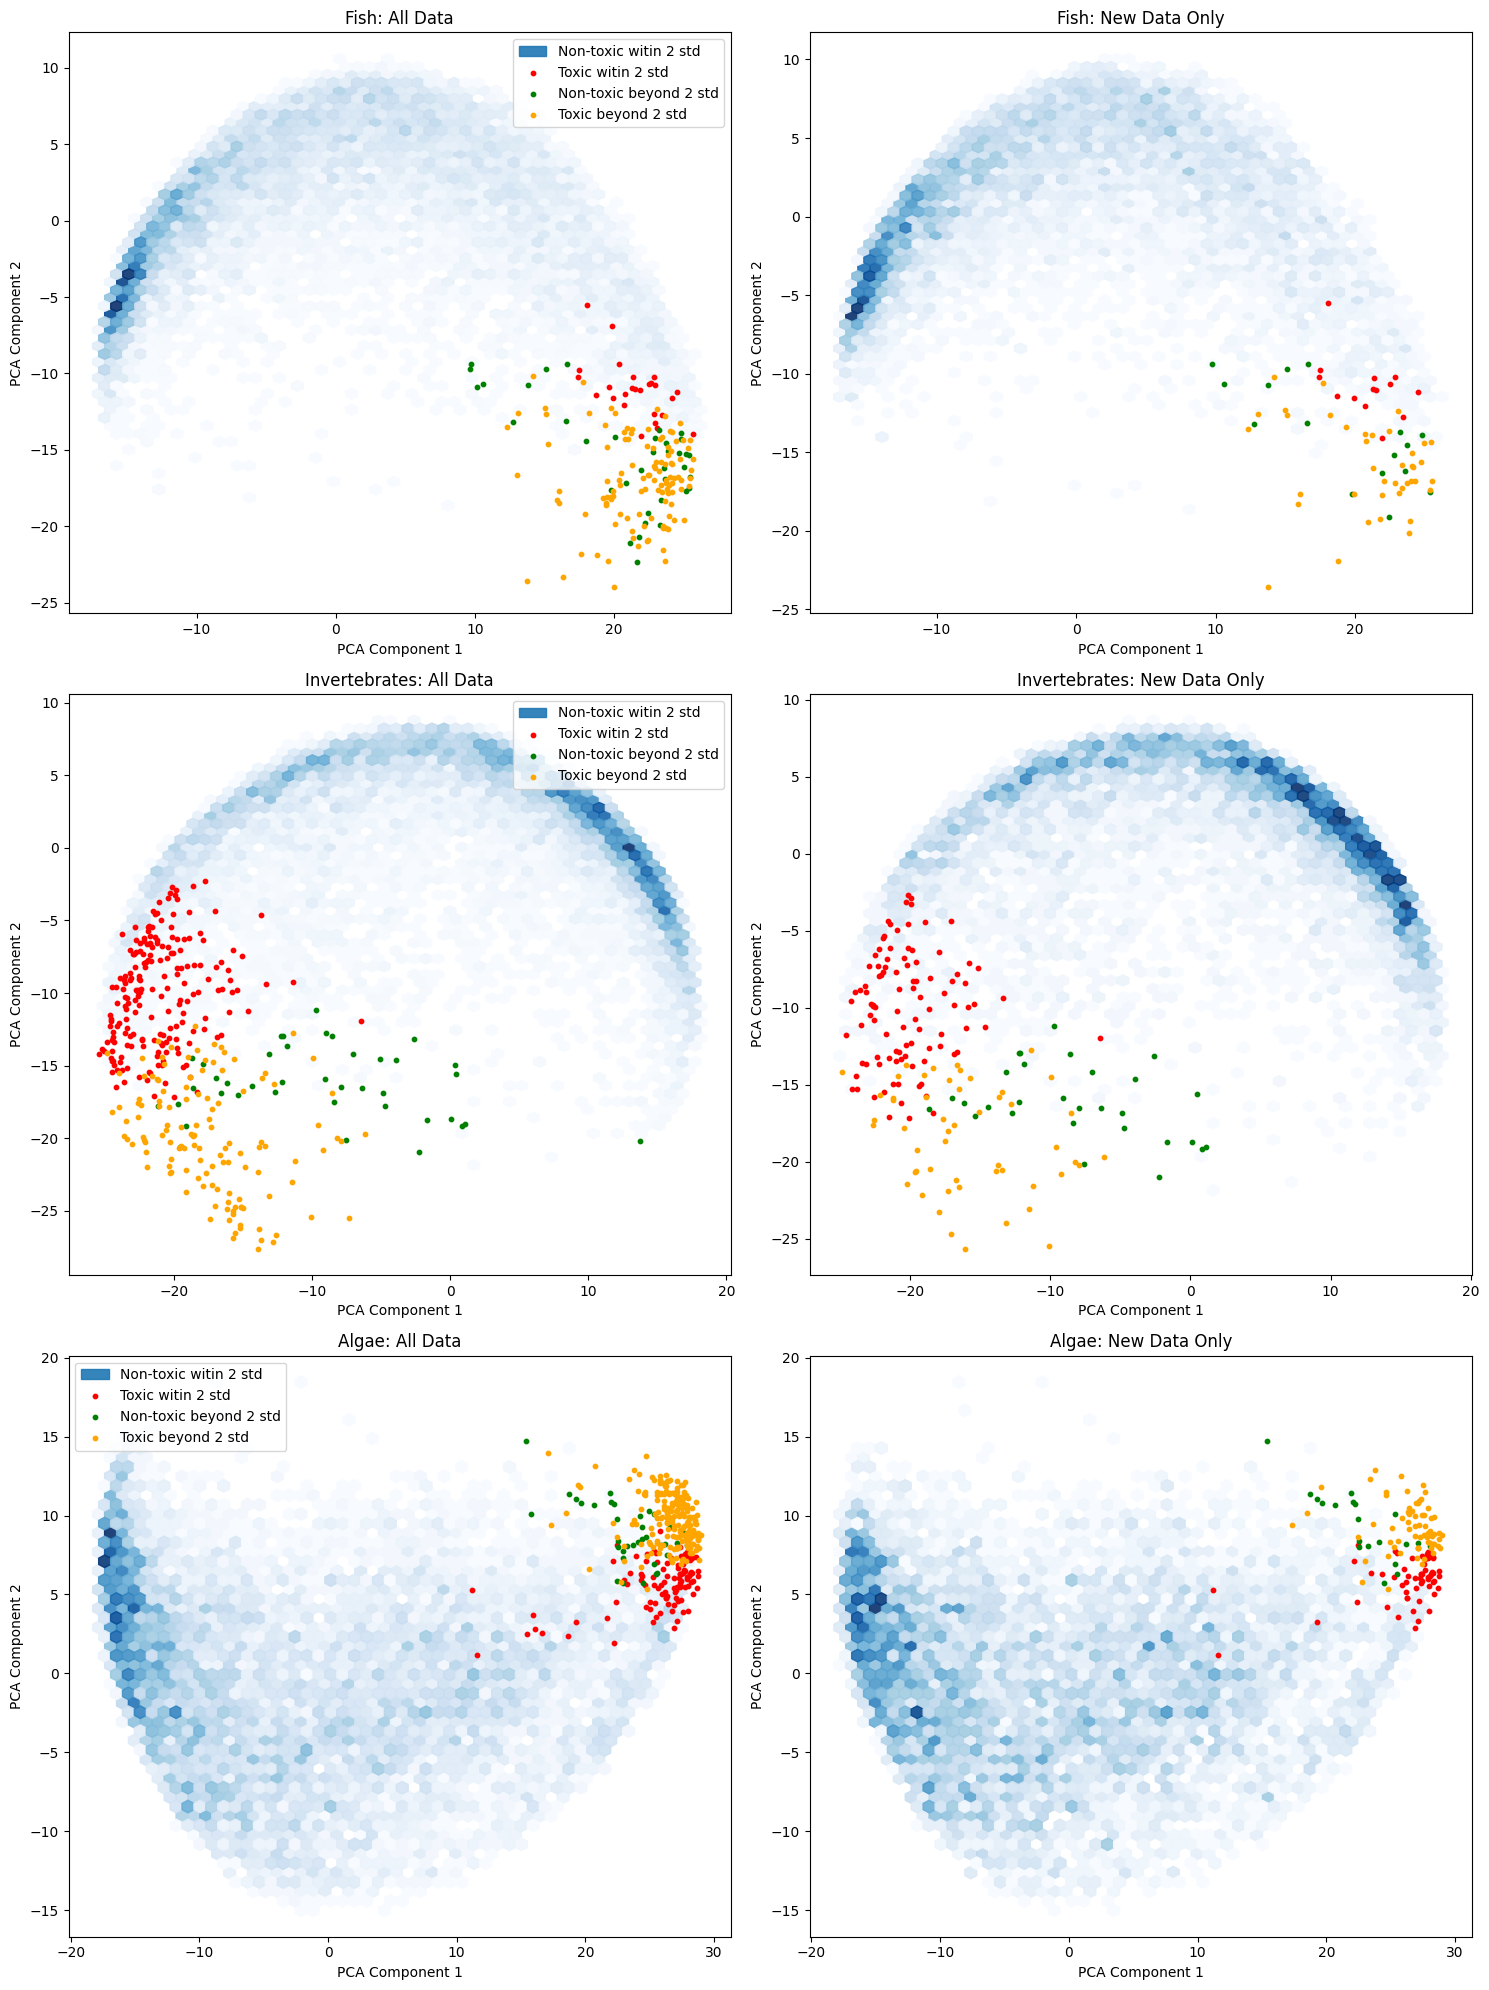

In [20]:
f=plot_hexbin_uncertain(results_fish,results_invertebrates,results_algae,threshold_value,1) 

In [21]:
f.savefig("reach_all_fig_EC10.pdf",format='pdf')

In [22]:
def plot_hexbin_uncertain_fish(df_fish, threshold, factor):
    vmin, vmax = 0, 100
    def prepare_data(df, threshold, factor):
        df['is toxic'] = (df['predictions (mg/L)'] * factor < threshold).astype(int)
        df['is uncertain'] = (abs(df['z-score mean cosine similarity']) > 2).astype(int)

        embeddings = np.array(df.CLS_embeddings.tolist()).astype(np.float32)
        pca = PCA(n_components=2).fit_transform(embeddings)
        projections = pd.DataFrame({'pc1': pca[:, 0], 'pc2': pca[:, 1]})
        return pd.concat([df, projections], axis=1)
    
    def plot_subplot(ax, df, title, show_legend=True):
        non_toxic_certain = df[(df['is toxic'] == 0)&(df['is uncertain']==0)]
        toxic_certain = df[(df['is toxic'] == 1)&(df['is uncertain']==0)]
        non_toxic_uncertain=df[(df['is toxic']==0)&(df['is uncertain']==1)]
        toxic_uncertain=df[(df['is toxic']==1)&(df['is uncertain']==1)]

        ax.hexbin(non_toxic_certain['pc1'], non_toxic_certain['pc2'], gridsize=50, cmap='Blues',mincnt=1, alpha=0.9,label='Non-toxic witin 2 std')
        ax.scatter(toxic_certain['pc1'], toxic_certain['pc2'], color='red', s=10, label='Toxic witin 2 std')
        ax.scatter(non_toxic_uncertain['pc1'],non_toxic_uncertain['pc2'],color='green',s=10, label='Non-toxic beyond 2 std')
        ax.scatter(toxic_uncertain['pc1'],toxic_uncertain['pc2'],color='orange',s=10, label='Toxic beyond 2 std')
        

        ax.set_title(title)
        ax.set_xlabel('PCA Component 1')
        ax.set_ylabel('PCA Component 2')
        if show_legend:
            
            ax.legend()

    # Prepare datasets
    df_fish = prepare_data(df_fish, threshold, factor)

    # Plot
    fig, axs = plt.subplots(1, 2, figsize=(15, 7))
    plot_subplot(axs[ 0], df_fish, f'Fish: All Data')
    plot_subplot(axs[ 1], df_fish[df_fish['Is in training'] == 0], f'Fish: New Data Only', show_legend=False)
    plt.tight_layout()
    #plt.savefig("reach_fish_EC50_fig.pdf",format='pdf')
    return fig

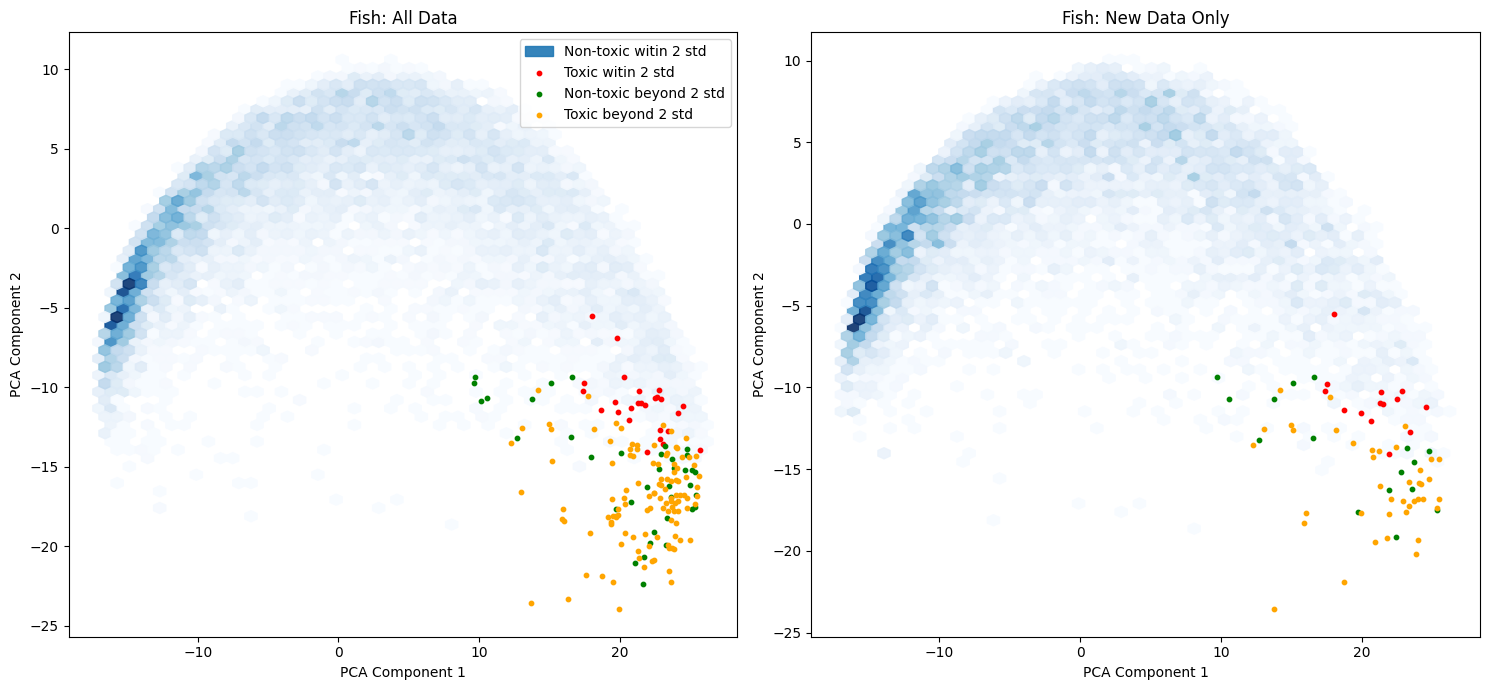

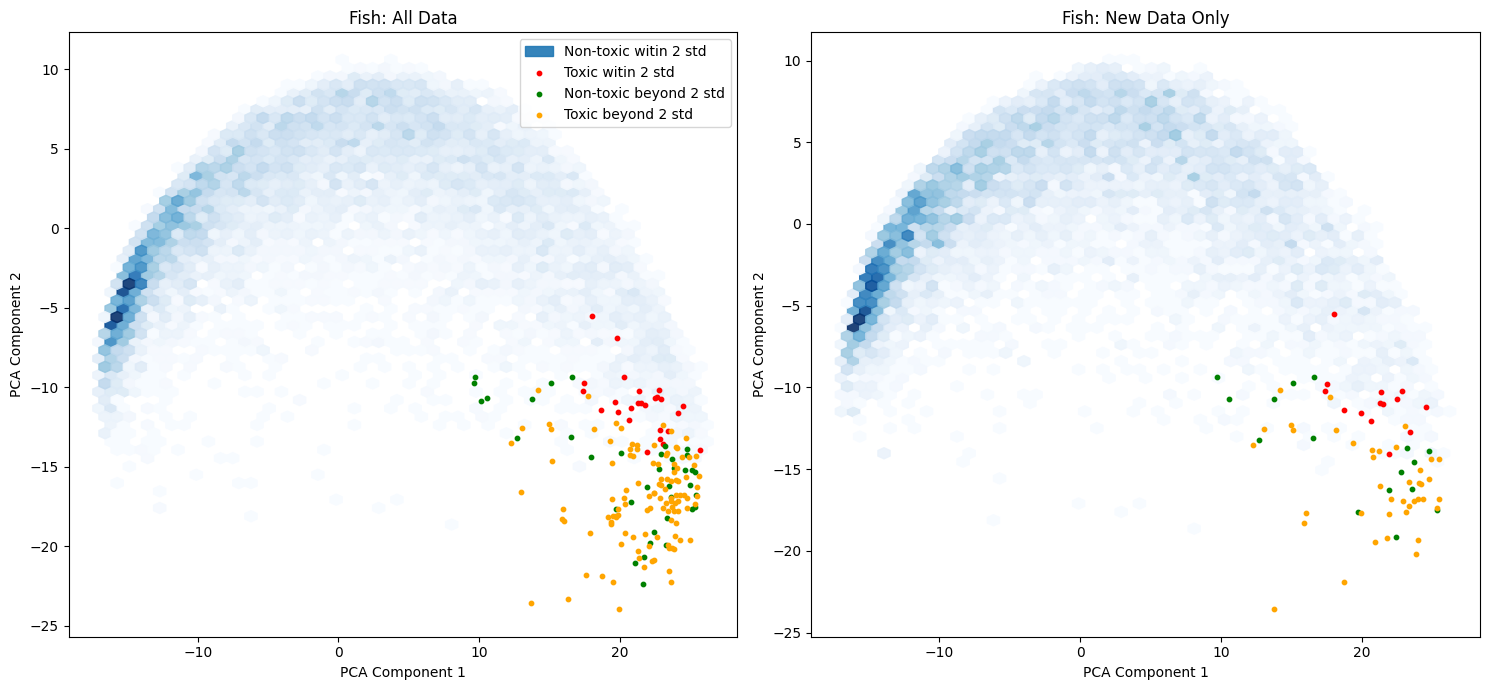

In [23]:
plot_hexbin_uncertain_fish(results_fish,threshold_value,1)

Collect the toxic chemicals 

In [24]:
def toxicity_interception(df_fish, df_invertebrate, df_algae, threshold, factor):
    def prepare_data(df, threshold, factor):
        df['is toxic'] = (df['predictions (mg/L)'] * factor < threshold).astype(int)

        return df
    def is_toxic(df):
        
        return df[df['is toxic']==1]
    
    def common_chem(df1, df2):
         if 'SMILES_Canonical_RDKit' not in df1.columns or 'SMILES_Canonical_RDKit' not in df2.columns:
            raise ValueError("Both DataFrames must contain the 'SMILES_Canonical_RDKit' column.")

    
        # Extract the 'SMILES_Canonical_RDKit' column as sets
         set1 = set(df1['SMILES_Canonical_RDKit'])
         set2 = set(df2['SMILES_Canonical_RDKit'])
         
         # Find the intersection of the two sets
         common_smiles = set1 & set2
     
         # Filter df1 to keep only rows with common elements
         df_common = df1[df1['SMILES_Canonical_RDKit'].isin(common_smiles)]

         return df_common

    
    df_fish = prepare_data(df_fish, threshold, factor)
    df_invertebrate = prepare_data(df_invertebrate, threshold, factor)
    df_algae = prepare_data(df_algae, threshold, factor)
    df_toxic_fish=is_toxic(df_fish)
    df_toxic_invertebrate=is_toxic(df_invertebrate)
    df_toxic_algae=is_toxic(df_algae)
    common_fish_invertebrate=common_chem(df1=df_toxic_fish,df2=df_toxic_invertebrate)
    common_fish_algae=common_chem(df1=df_toxic_fish,df2=df_toxic_algae)
    common_invertebrate_algae=common_chem(df1=df_toxic_invertebrate,df2=df_toxic_algae)
    common_all=common_chem(df1=common_fish_invertebrate,df2=df_toxic_algae)



    return common_fish_invertebrate,common_fish_algae,common_invertebrate_algae,common_all

In [25]:
fish_new=results_fish[results_fish['Is in training']==0]
invertebrate_new=results_invertebrates[results_invertebrates['Is in training']==0]
algae_new=results_algae[results_algae['Is in training']==0]

In [26]:
common_fish_invertebrate,common_fish_algae, common_invertebrate_algae,common_all=toxicity_interception(fish_new,invertebrate_new,algae_new,threshold=threshold_value,factor=1)

Look at those not in training

In [27]:
# are interested only in those that have no measured value
common_fish_invertebrate=common_fish_invertebrate[common_fish_invertebrate['Is in training']==0]
common_fish_algae=common_fish_algae[common_fish_algae['Is in training']==0]
common_invertebrate_algae=common_invertebrate_algae[common_invertebrate_algae['Is in training']==0]
common_all=common_all[common_all['Is in training']==0]

In [28]:
print(len(common_fish_invertebrate))
common_fish_invertebrate

7


,SMILES,exposure_duration log10(h),endpoint,effect,SMILES_Canonical_RDKit,predictions log10(mg/L),predictions (mg/L),CLS_embeddings,most similar chemical,max cosine similarity,mean cosine similarity,z-score mean cosine similarity,Is in training,is toxic,is uncertain
3190,Oc1cc2ccccc2cc1C(=O)Nc3ccc(Cl)cc3,1.982271,EC50,MOR,O=C(Nc1ccc(Cl)cc1)c1cc2ccccc2cc1O,-1.458309,0.034809,"[-0.24467328190803528, -1.2715299129486084, 0....",O=C(Nc1ccc([N+](=O)[O-])cc1Cl)c1cc(Cl)ccc1O,0.864528,0.021984,-2.391492,0,1,1
3295,ClC1=C(Cl)C(=O)C(=C(C#N)C1=O)C#N,1.982271,EC50,MOR,N#CC1=C(C#N)C(=O)C(Cl)=C(Cl)C1=O,-1.143421,0.071875,"[-0.3328104615211487, 0.1910637617111206, -1.0...",O=C1C(Cl)=C(Cl)C(=O)c2ccccc21,0.832501,0.106688,-1.840859,0,1,0
3398,CCN(CCOC(C)OCC(C)C)c1ccc(cc1)N=Nc2ccc(cc2Cl)[N...,1.982271,EC50,MOR,CCN(CCOC(C)OCC(C)C)c1ccc(N=Nc2ccc([N+](=O)[O-]...,-1.023556,0.094721,"[1.2253825664520264, -1.3849670886993408, -0.3...",CCN(CCOC(C)OCC(C)C)c1ccc(N=Nc2ccccc2)cc1,0.759014,0.059925,-2.144847,0,1,1
5575,CCCC[O]|[Sn](|[O]CCCC)(CCCC)CCCC,1.982271,EC50,MOR,CCCC[O]|[Sn](|[O]CCCC)(CCCC)CCCC,-1.599052,0.025174,"[-1.136741042137146, -1.2329577207565308, -0.3...",C[O]|[Sn](CCCC)(CCCC)CCCC,0.984344,-0.052171,-2.873559,0,1,1
8374,P,1.982271,EC50,MOR,P,-1.218088,0.060522,"[-1.6357715129852295, -1.3594180345535278, -0....",S=[SnH2],0.921125,-0.049956,-2.859156,0,1,1
8395,CC(C)(C)c1ccc(O)c(c1)C(C)(C)C.ClP(Cl)Cl.c2ccc(...,1.982271,EC50,MOR,CC(C)(C)c1ccc(O)c(C(C)(C)C)c1.ClP(Cl)Cl.c1ccc(...,-1.254234,0.055689,"[-0.25908175110816956, 0.8143171072006226, 0.7...",CCCC(c1cc(C(C)(C)C)c(O)cc1C)c1cc(C(C)(C)C)c(O)...,0.675573,0.095444,-1.913948,0,1,0
9471,CC1(C)[C@H](C=C(Cl)Cl)[C@H]1C(=O)OCc2c(F)c(F)c...,1.982271,EC50,MOR,CC1(C)[C@H](C=C(Cl)Cl)[C@H]1C(=O)OCc1c(F)c(F)c...,-1.301719,0.049921,"[-0.5670451521873474, -1.3028407096862793, 0.1...",CC1(C)[C@H](C=C(Cl)Cl)[C@H]1C(=O)OCc1cccc(Oc2c...,0.829512,0.038824,-2.282023,0,1,1


In [29]:
print(len(common_fish_algae))
common_fish_algae

3


,SMILES,exposure_duration log10(h),endpoint,effect,SMILES_Canonical_RDKit,predictions log10(mg/L),predictions (mg/L),CLS_embeddings,most similar chemical,max cosine similarity,mean cosine similarity,z-score mean cosine similarity,Is in training,is toxic,is uncertain
5575,CCCC[O]|[Sn](|[O]CCCC)(CCCC)CCCC,1.982271,EC50,MOR,CCCC[O]|[Sn](|[O]CCCC)(CCCC)CCCC,-1.599052,0.025174,"[-1.136741042137146, -1.2329577207565308, -0.3...",C[O]|[Sn](CCCC)(CCCC)CCCC,0.984344,-0.052171,-2.873559,0,1,1
5595,C[O]|[Sn](|[O]C)(CCCC)CCCC,1.982271,EC50,MOR,C[O]|[Sn](|[O]C)(CCCC)CCCC,-1.486803,0.032598,"[-1.311124563217163, -1.2007439136505127, -0.4...",CCCC[Sn](|[O]C(=O)c1ccccc1)(CCCC)CCCC,0.973187,-0.055123,-2.892746,0,1,1
9536,[Cu++].[Cu++].[Cu++].[O-][P]([O-])([O-])=O.[O-...,1.982271,EC50,MOR,O=P([O-])([O-])[O-].O=P([O-])([O-])[O-].[Cu+2]...,-1.089488,0.081379,"[-1.0803108215332031, -0.8618977665901184, -0....",O=P([O-])([O-])[O-].O=P([O-])([O-])[O-].[Zn+2]...,0.951168,0.013569,-2.446201,0,1,1


In [30]:
print(len(common_invertebrate_algae))
common_invertebrate_algae

21


,SMILES,exposure_duration log10(h),endpoint,effect,SMILES_Canonical_RDKit,predictions log10(mg/L),predictions (mg/L),CLS_embeddings,most similar chemical,max cosine similarity,mean cosine similarity,z-score mean cosine similarity,Is in training,is toxic,is uncertain
458,CCCCCCCC[Si](C)(O[Si](C)(C)C)O[Si](C)(C)C,1.982271,EC50,MOR,CCCCCCCC[Si](C)(O[Si](C)(C)C)O[Si](C)(C)C,-1.752305,0.017689,"[-1.4780949354171753, 0.6989397406578064, 0.98...",CCCCCCCC[Sn]|1(|[O]C(=O)CC[S]|1)CCCCCCCC,0.724788,0.124619,-2.210050,0,1,1
1919,CCN(CC)c1ccc(N=Nc2c(cc(cc2C#N)[N+]([O-])=O)C#N...,1.982271,EC50,MOR,CCN(CC)c1ccc(N=Nc2c(C#N)cc([N+](=O)[O-])cc2C#N...,-2.247963,0.005650,"[-0.7363123893737793, 1.2192884683609009, -0.0...",CCN(CC)c1ccc(N=Nc2c(C#N)cc([N+](=O)[O-])cc2[N+...,0.872683,0.116042,-2.264330,0,1,1
4306,CCCCCCCCCCCCc1cc(C)cc(n2nc3ccccc3n2)c1O,1.982271,EC50,MOR,CCCCCCCCCCCCc1cc(C)cc(-n2nc3ccccc3n2)c1O,-1.268454,0.053895,"[-1.8752260208129883, -0.3338584005832672, -0....",CCCCCCCCCCCC[n+]1ccccc1.[Cl-],0.851512,0.299276,-1.104703,0,1,0
4851,CCCCCCCC[Sn](|[O]C(=O)C(CC)CCCC)(|[O]C(=O)C(CC...,1.982271,EC50,MOR,CCCCCCCC[Sn](|[O]C(=O)C(CC)CCCC)(|[O]C(=O)C(CC...,-1.462598,0.034467,"[-0.7002267837524414, -0.11795744299888611, 0....",O|[Cd]|O,0.872271,0.322419,-0.958240,0,1,0
5192,[Cl]|[Sn](CCCCCCCC)(CCCCCCCC)CCCCCCCC,1.982271,EC50,MOR,[Cl]|[Sn](CCCCCCCC)(CCCCCCCC)CCCCCCCC,-1.981067,0.010446,"[-1.489038109779358, 0.7124207019805908, 0.820...",[Cl]|[Sn](CCCC)(CCCC)CCCC,0.944584,0.139199,-2.117777,0,1,1
5575,CCCC[O]|[Sn](|[O]CCCC)(CCCC)CCCC,1.982271,EC50,MOR,CCCC[O]|[Sn](|[O]CCCC)(CCCC)CCCC,-1.407560,0.039124,"[-1.0111026763916016, 0.3795599639415741, 0.39...",CCCC[Sn](|[O]C(=O)C(C)=C)(CCCC)CCCC,0.918983,0.151005,-2.043060,0,1,1
5635,[OH-].[Cu++].[Cu++].[O-][P]([O-])([O-])=O,1.982271,EC50,MOR,O=P([O-])([O-])[O-].[Cu+2].[Cu+2].[OH-],-1.007179,0.098361,"[-3.162867307662964, -0.054882895201444626, -0...",O=[N+]([O-])[O-].O=[N+]([O-])[O-].[Cu+2],0.963000,0.216146,-1.630806,0,1,0
5643,CCCCCCCCCCNCCCCCCCCCC,1.982271,EC50,MOR,CCCCCCCCCCNCCCCCCCCCC,-1.782034,0.016518,"[-0.9252513647079468, 0.7662529945373535, 0.53...",CCCCCCCCCCN(C)CCCCCCCCCC,0.914145,0.158166,-1.997741,0,1,0
6621,CCCCCCCCCCCCCCCCOC(=O)C(CC)CCCC,1.982271,EC50,MOR,CCCCCCCCCCCCCCCCOC(=O)C(CC)CCCC,-1.637752,0.023028,"[-1.4267436265945435, 0.30671069025993347, 0.0...",CCCCCCCCCCCCCCCC[n+]1ccccc1.[Cl-],0.908877,0.289476,-1.166729,0,1,0
6623,CCCCCCCCCCCCCCCCOC(C)=O,1.982271,EC50,MOR,CCCCCCCCCCCCCCCCOC(C)=O,-1.577994,0.026424,"[-2.0067150592803955, 0.5251343250274658, 0.22...",O=[As]([O-])(O)O.[K+],0.962152,0.155990,-2.011510,0,1,1


In [31]:
print(results_fish['SMILES_Canonical_RDKit'].value_counts())
#print(results_invertebrates['SMILES_Canonical_RDKit'].value_counts())
#print(results_algae['SMILES_Canonical_RDKit'].value_counts())


SMILES_Canonical_RDKit
O=C1CCCCCN1                                             1
CC(C)CCON=O                                             1
CCC12CC[C@@H]3[C@H]4CCC(=O)C=C4CC[C@H]3[C@@H]1CCC2=O    1
CCC(N)CO                                                1
C[C@H]([NH3+])CO                                        1
                                                       ..
CC1(C)C2CC[C@]1(CS(=O)(=O)O)C(=O)C2                     1
CC1(C)[C@@H](O)[C@@]2(C)CC[C@@H]1C2                     1
CC(=O)OC1C2(C)CCC(C2)C1(C)C                             1
N[C@H]1CCCC[C@H]1N.O=S(=O)(O)O                          1
O=C1NC(=O)C2C3CCC(C3)C12                                1
Name: count, Length: 10014, dtype: int64


In [32]:
print(len(common_all))
common_all


1


,SMILES,exposure_duration log10(h),endpoint,effect,SMILES_Canonical_RDKit,predictions log10(mg/L),predictions (mg/L),CLS_embeddings,most similar chemical,max cosine similarity,mean cosine similarity,z-score mean cosine similarity,Is in training,is toxic,is uncertain
5575,CCCC[O]|[Sn](|[O]CCCC)(CCCC)CCCC,1.982271,EC50,MOR,CCCC[O]|[Sn](|[O]CCCC)(CCCC)CCCC,-1.599052,0.025174,"[-1.136741042137146, -1.2329577207565308, -0.3...",C[O]|[Sn](CCCC)(CCCC)CCCC,0.984344,-0.052171,-2.873559,0,1,1


In [33]:


reach_with_names=data
# Retrieve Canonical SMILES using RDKit
# Convert the SMILES to canonical SMILES using RDKit

def convert_to_canonical(smiles):
    mol = Chem.MolFromSmiles(smiles)  # Convert SMILES string to RDKit mol
    if mol:  # If mol is not None (i.e., a valid SMILES)
        return Chem.MolToSmiles(mol, canonical=True)  # Convert to canonical SMILES
    else:
        return smiles  # Return smiles for the invalid SMILES

# Add the new column
reach_with_names['SMILES_Canonical_RDKit'] = reach_with_names['SMILES'].apply(
    lambda x: convert_to_canonical(x) if pd.notnull(x) else None)




In [34]:
toxic_with_names_common_all = pd.merge(common_all, reach_with_names, on='SMILES_Canonical_RDKit', how='inner')
toxic_with_names_common_fish_invertebrates = pd.merge(common_fish_invertebrate, reach_with_names, on='SMILES_Canonical_RDKit', how='inner')
toxic_with_names_common_fish_algae = pd.merge(common_fish_algae, reach_with_names, on='SMILES_Canonical_RDKit', how='inner')
toxic_with_names_common_invertebrates_algae = pd.merge(common_invertebrate_algae, reach_with_names, on='SMILES_Canonical_RDKit', how='inner')


In [35]:
toxic_with_names_common_all['Name']

0    Dibutoxydibutylstannane
Name: Name, dtype: object

In [36]:
# Convert to LaTeX table format
latex_table_toxic_w_names_common_all = toxic_with_names_common_all[['CAS', 'Name']].to_latex(index=False)

# Print
print(latex_table_toxic_w_names_common_all)  


\begin{tabular}{ll}
\toprule
CAS & Name \\
\midrule
3349-36-8 & Dibutoxydibutylstannane \\
\bottomrule
\end{tabular}



In [37]:
toxic_with_names_common_all['Name']

0    Dibutoxydibutylstannane
Name: Name, dtype: object

In [38]:
print(toxic_with_names_common_fish_invertebrates['Name'])
latex_table_toxic_w_names_common_fish_invertebrates = toxic_with_names_common_fish_invertebrates[['CAS', 'Name']].to_latex(index=False)

# Print 
print(latex_table_toxic_w_names_common_fish_invertebrates)  


0                  4'-chloro-3-hydroxy-2-naphthanilide
1    4,5-dichloro-3,6-dioxocyclohexa-1,4-diene-1,2-...
2    4-[(2-chloro-4-nitrophenyl)azo]-N-ethyl-N-[2-[...
3                              Dibutoxydibutylstannane
4                                            Phosphine
5    Phosphorous trichloride, reaction products wit...
6    transfluthrin (ISO); 2,3,5,6-tetrafluorobenzyl...
Name: Name, dtype: object
\begin{tabular}{ll}
\toprule
CAS & Name \\
\midrule
92-78-4 & 4'-chloro-3-hydroxy-2-naphthanilide \\
84-58-2 & 4,5-dichloro-3,6-dioxocyclohexa-1,4-diene-1,2-dicarbonitrile \\
85750-13-6 & 4-[(2-chloro-4-nitrophenyl)azo]-N-ethyl-N-[2-[1-(2-methylpropoxy)ethoxy]ethyl]aniline \\
3349-36-8 & Dibutoxydibutylstannane \\
7803-51-2 & Phosphine \\
119345-01-6 & Phosphorous trichloride, reaction products with 1,1'-biphenyl and 2,4-bis(1,1-dimethylethyl)phenol \\
118712-89-3 & transfluthrin (ISO); 2,3,5,6-tetrafluorobenzyl (1R,3S)-3-(2,2-dichlorovinyl)-2,2-dimethylcyclopropanecarboxylate \\
\b

In [39]:
print(toxic_with_names_common_fish_algae['Name'])
latex_table_toxic_w_names_common_fish_algae = toxic_with_names_common_fish_algae[['CAS', 'Name']].to_latex(index=False)

# Print 
print(latex_table_toxic_w_names_common_fish_algae)  


0          Dibutoxydibutylstannane
1         Dibutyldimethoxystannane
2    Tricopper bis(orthophosphate)
Name: Name, dtype: object
\begin{tabular}{ll}
\toprule
CAS & Name \\
\midrule
3349-36-8 & Dibutoxydibutylstannane \\
1067-55-6 & Dibutyldimethoxystannane \\
7798-23-4 & Tricopper bis(orthophosphate) \\
\bottomrule
\end{tabular}



In [40]:
print(toxic_with_names_common_invertebrates_algae['Name'])
latex_table_toxic_w_names_common_invertebrates_algae = toxic_with_names_common_invertebrates_algae[['CAS', 'Name']].to_latex(index=False)

# Print 
print(latex_table_toxic_w_names_common_invertebrates_algae)  


0          1,1,1,3,5,5,5-heptamethyl-3-octyltrisiloxane
1     2-[[4-(diethylamino)-2-methylphenyl]azo]-5-nit...
2     A mixture of: isomers of 2-(2H-benzotriazol-2-...
3           Bis[(2-ethyl-1-oxohexyl)oxy]dioctylstannane
4                                Chlorotrioctylstannane
5                               Dibutoxydibutylstannane
6                          Dicopper hydroxide phosphate
7                                          Didecylamine
8                            Hexadecyl 2-ethylhexanoate
9                                     Hexadecyl acetate
10                              Hexadecyl chloroformate
11                                 Hexadecyl isocyanate
12                         N-dodecylpropane-1,3-diamine
13                                   Palladium sulphate
14                                Palladium(II) acetate
15    Quaternary ammonium compounds, di-C14-18-alkyl...
16                 Tetraamminepalladium(2+) dihydroxide
17                                        Tetrao